### Pulling in data
We are doing what we have done in previous notebooks of creating new instances

In [95]:
import pandas as pd
import numpy as np

nba_data = pd.read_csv("nba_contracts_history.csv")
nba_data["PPG"] = nba_data["PTS"]/(nba_data["GP"])
nba_data["APG"] = nba_data["AST"]/(nba_data["GP"])
nba_data["RPG"] = nba_data["REB"]/(nba_data["GP"])
nba_data.describe()
#Makes salary more managable
nba_data['AVG_SALARY'] = nba_data['AVG_SALARY']/1000000

nba_data['SALARY_CAT'] = pd.cut(nba_data.AVG_SALARY, [-np.inf, 4.999, 9.999, 14.999, 19.999, np.inf],
                              labels=['<5mil', '5-10mil', '10-15mil', '15-20mil', '20mil+'])
print(nba_data)

                NAME  CONTRACT_START  CONTRACT_END  AVG_SALARY   AGE    GP  \
0    Wesley Matthews            2019          2020    2.564753  32.0  69.0   
1        Brook Lopez            2015          2017   21.165675  27.0  72.0   
2     DeAndre Jordan            2011          2014   10.759764  22.0  80.0   
3    Markieff Morris            2015          2018    8.143323  25.0  82.0   
4      Dwight Howard            2018          2019   13.410739  32.0  81.0   
..               ...             ...           ...         ...   ...   ...   
194      Brook Lopez            2012          2014   14.693667  24.0   5.0   
195   Nikola Vucevic            2015          2018   12.000000  24.0  74.0   
196      Aron Baynes            2015          2017    5.766667  28.0  70.0   
197   Andre Iguodala            2013          2016   12.000000  29.0  80.0   
198   Draymond Green            2015          2019   16.400000  25.0  79.0   

        W     L     MIN     PTS  ...    AST    TOV    STL    BL

In [96]:
from sklearn.cluster import KMeans
X = nba_data[['PPG', 'APG', 'RPG']]
y = nba_data['SALARY_CAT']
kmeans_classifier = KMeans(n_clusters=3)
kmeans_classifier.fit(X)

KMeans(n_clusters=3)

In [97]:
import math
print("The distortion is ", kmeans_classifier.inertia_)

RMS_average = math.sqrt(kmeans_classifier.inertia_ / len(X))

print("Averaging and taking the square root gives ", RMS_average)

The distortion is  2930.3767986306448
Averaging and taking the square root gives  3.837383425057726


In [98]:
print("The centroids are ", kmeans_classifier.cluster_centers_)

print("Assignments are: ")
print(kmeans_classifier.labels_)

The centroids are  [[14.45451455  3.28300864  6.21408728]
 [ 6.78228484  1.34190607  3.12560348]
 [23.75680947  4.91413454  6.5201421 ]]
Assignments are: 
[0 0 1 0 0 1 1 1 1 0 2 1 1 1 1 1 1 2 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 2 2
 0 1 0 1 1 0 2 1 0 0 0 0 1 2 0 0 0 0 0 1 1 0 2 0 1 1 1 1 1 1 1 0 0 1 2 1 0
 0 1 1 0 1 2 1 2 0 0 1 0 0 0 2 1 1 0 0 0 2 1 0 0 1 2 0 2 0 1 1 1 1 0 0 0 1
 0 0 1 1 1 2 1 1 0 1 1 1 1 1 0 1 0 1 0 2 1 1 1 1 1 1 2 0 2 1 0 1 0 1 0 1 0
 1 2 0 0 2 0 0 0 2 1 1 2 1 1 1 1 2 1 1 0 1 0 1 1 0 0 1 2 2 0 1 0 1 1 1 0 1
 0 0 2 0 1 0 2 1 1 0 0 1 0 0]


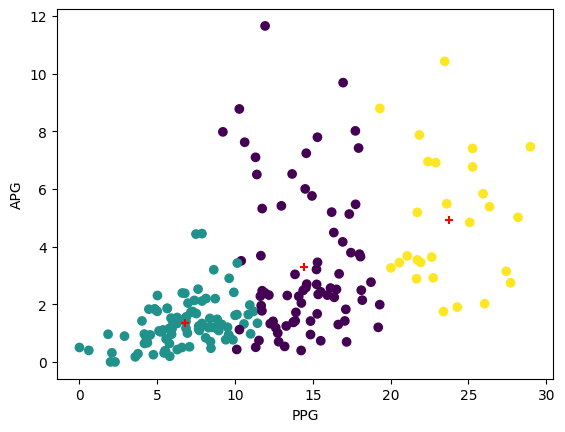

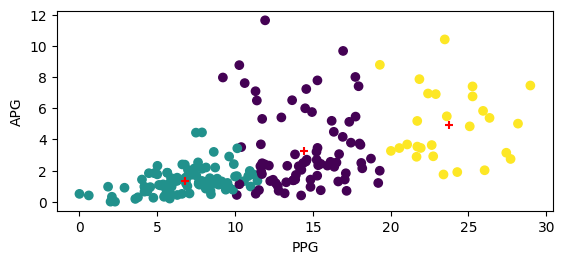

In [99]:
cluster_x = [x for [x,y,z] in kmeans_classifier.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans_classifier.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans_classifier.cluster_centers_]
import matplotlib.pyplot as plt
plt.scatter(nba_data['PPG'], nba_data['APG'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("PPG")
plt.ylabel("APG")
plt.show()

plt.scatter(nba_data['PPG'], nba_data['APG'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("PPG")
plt.ylabel("APG")
plt.axis("scaled")
plt.show()

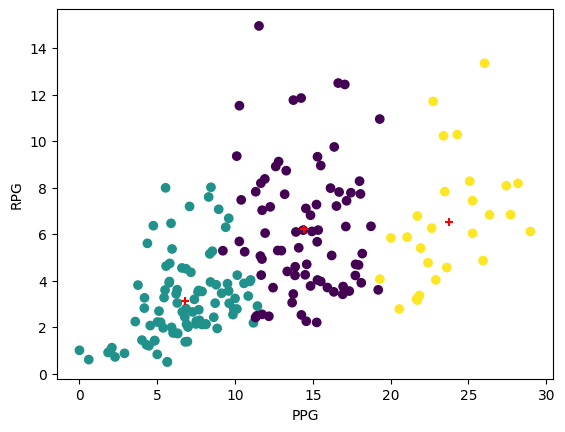

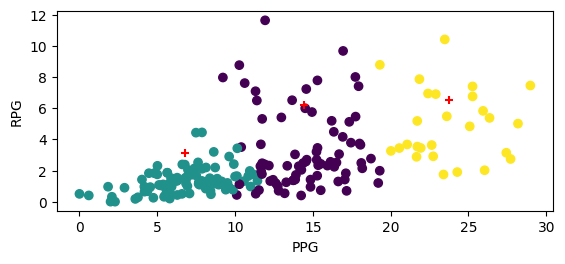

In [100]:
cluster_x = [x for [x,y,z] in kmeans_classifier.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans_classifier.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans_classifier.cluster_centers_]
import matplotlib.pyplot as plt
plt.scatter(nba_data['PPG'], nba_data['RPG'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_z, marker="+", color="red")
plt.xlabel("PPG")
plt.ylabel("RPG")
plt.show()

plt.scatter(nba_data['PPG'], nba_data['APG'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_z, marker="+", color="red")
plt.xlabel("PPG")
plt.ylabel("RPG")
plt.axis("scaled")
plt.show()

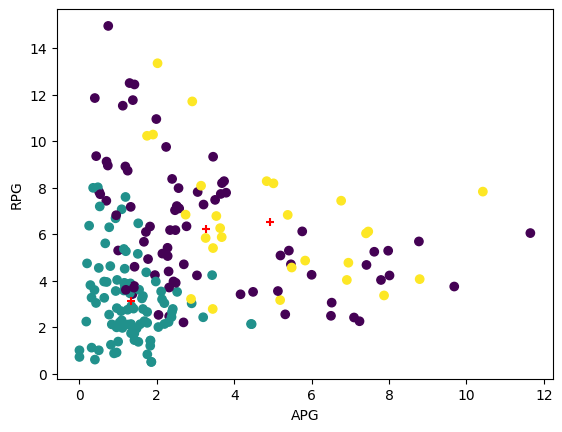

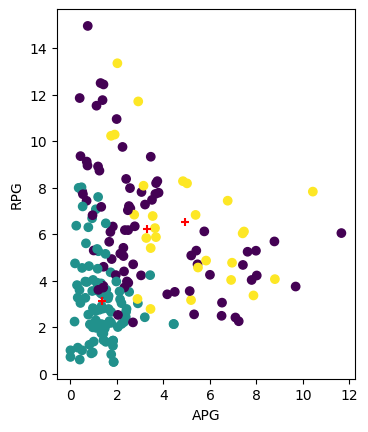

In [101]:
cluster_x = [x for [x,y,z] in kmeans_classifier.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans_classifier.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans_classifier.cluster_centers_]
import matplotlib.pyplot as plt
plt.scatter(nba_data['APG'], nba_data['RPG'], c=kmeans_classifier.labels_)
plt.scatter(cluster_y, cluster_z, marker="+", color="red")
plt.xlabel("APG")
plt.ylabel("RPG")
plt.show()

plt.scatter(nba_data['APG'], nba_data['RPG'], c=kmeans_classifier.labels_)
plt.scatter(cluster_y, cluster_z, marker="+", color="red")
plt.xlabel("APG")
plt.ylabel("RPG")
plt.axis("scaled")
plt.show()

In [102]:
for i in range(10):
    kmeans_classifier = KMeans(n_clusters=3)
    kmeans_classifier.fit(X)
    print("The centroids are ", kmeans_classifier.cluster_centers_, " with distortion ", kmeans_classifier.inertia_)

The centroids are  [[14.2692476   3.22970385  6.05801345]
 [ 6.63900884  1.33902253  3.10899465]
 [23.59754118  4.80957568  6.67820652]]  with distortion  2928.4588546969494
The centroids are  [[22.36324941  4.90571756  6.39589222]
 [ 6.41644008  1.31142066  3.05367984]
 [13.63025896  2.92866843  5.99585435]]  with distortion  2961.9194317145866
The centroids are  [[14.2692476   3.22970385  6.05801345]
 [ 6.63900884  1.33902253  3.10899465]
 [23.59754118  4.80957568  6.67820652]]  with distortion  2928.4588546969494
The centroids are  [[23.59754118  4.80957568  6.67820652]
 [ 6.63900884  1.33902253  3.10899465]
 [14.2692476   3.22970385  6.05801345]]  with distortion  2928.4588546969494
The centroids are  [[ 6.41644008  1.31142066  3.05367984]
 [22.36324941  4.90571756  6.39589222]
 [13.63025896  2.92866843  5.99585435]]  with distortion  2961.9194317145866
The centroids are  [[22.36324941  4.90571756  6.39589222]
 [13.63025896  2.92866843  5.99585435]
 [ 6.41644008  1.31142066  3.0536

In [103]:
from sklearn.cluster import KMeans

two_classifier = KMeans(n_clusters=2)
two_classifier.fit(X)

three_classifier = KMeans(n_clusters=3)
three_classifier.fit(X)

four_classifier = KMeans(n_clusters=4)
four_classifier.fit(X)

KMeans(n_clusters=4)

In [104]:
import math

two_RMS_average = math.sqrt(two_classifier.inertia_ / len(X))
three_RMS_average = math.sqrt(three_classifier.inertia_ / len(X))
four_RMS_average = math.sqrt(four_classifier.inertia_ / len(X))

print("The 2 cluster distortion is ", two_classifier.inertia_, " RMS ", two_RMS_average)
print("The 3 cluster distortion is ", three_classifier.inertia_, " RMS ", three_RMS_average)
print("The 4 cluster distortion is ", four_classifier.inertia_, " RMS ", four_RMS_average)

The 2 cluster distortion is  4498.058522836491  RMS  4.754293760379387
The 3 cluster distortion is  2961.9194317145866  RMS  3.8579809803570724
The 4 cluster distortion is  2410.536003069966  RMS  3.4804089194493715


In [106]:
print("The 2 centroids are ", two_classifier.cluster_centers_)
print("The 3 centroids are ", three_classifier.cluster_centers_)
print("The 4 centroids are ", four_classifier.cluster_centers_)


The 2 centroids are  [[18.14405363  3.75651782  6.40615223]
 [ 7.58049304  1.71571459  3.59672309]]
The 3 centroids are  [[ 6.41644008  1.31142066  3.05367984]
 [22.36324941  4.90571756  6.39589222]
 [13.63025896  2.92866843  5.99585435]]
The 4 centroids are  [[ 6.4529548   1.30706184  3.09533831]
 [23.75680947  4.91413454  6.5201421 ]
 [13.64892901  4.1159088   4.07424765]
 [14.82246622  1.91718494  8.47695176]]


# Random Forest

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
randF = RandomForestClassifier(random_state = 15)
randF.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_predicted = randF.predict(X_train)

matrix = confusion_matrix(y_train, y_predicted)
print(matrix)

print ("Accuracy is ", accuracy_score(y_train, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y_train, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_train, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_train, y_predicted, average="weighted"))

[[31  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 26  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 43]]
Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = Pipeline([
    ('addCubic', PolynomialFeatures(degree=3)),
    ('scale', StandardScaler()),
    ('svm', SVC())
])

# train the model
model.fit(X_train,y_train)

Pipeline(steps=[('addCubic', PolynomialFeatures(degree=3)),
                ('scale', StandardScaler()), ('svm', SVC())])

In [135]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print("The accuracy is ", accuracy_score(y_test, y_pred))

The accuracy is  0.575


In [150]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

# Make each of the models in the ensemble
model_logreg = LogisticRegression(solver='liblinear', max_iter =500)
model_svm = SVC(kernel='linear')
model_random_forest = RandomForestClassifier(n_estimators=10)

# Use the Voting Classifier as the ensemble
ensemble = VotingClassifier(
    voting = 'hard',
    estimators = [
    ('logreg', model_logreg),
    ('svm', model_svm),
    ('randfor', model_random_forest)   
])

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print("Ensemble has accuracy ", accuracy_score(y_test, y_pred))

Ensemble has accuracy  0.6


In [151]:
from sklearn.metrics import accuracy_score
for classifier in [model_logreg, model_svm, model_random_forest, ensemble]:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)

    print(classifier.__class__.__name__, " has accuracy ", accuracy_score(y_test, y_pred))

LogisticRegression  has accuracy  0.525
SVC  has accuracy  0.575
RandomForestClassifier  has accuracy  0.375
VotingClassifier  has accuracy  0.575
